In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.2562   | 2.218     | 3.485     | 5.386     |
| 4         | -0.1947   | 0.8977    | 6.249     | 1.596     |
| 8         | -0.188    | 0.3402    | 1.713     | 6.415     |
| 34        | -0.1846   | 0.4473    | 3.705     | 2.403     |
| 41        | -0.18     | 0.01      | 5.01      | 4.201     |
| 44        | -0.1796   | 0.01      | 7.271     | 3.118     |
| 52        | -0.169    | 0.1143    | 9.843     | 1.757     |
| 90        | -0.1518   | 0.01815   | 9.398     | 1.955     |
| 91        | -0.07305  | 0.01      | 9.18      | 1.475     |
| 92        | -0.04119  | 0.1601    | 8.654     | 0.7141    |
Curve params found
{'push': 0.16010235417120727,
 'shift': 8.65416582849662,
 'slope': 0.714098102223296}
-
## Chance of nonscaling delay ##


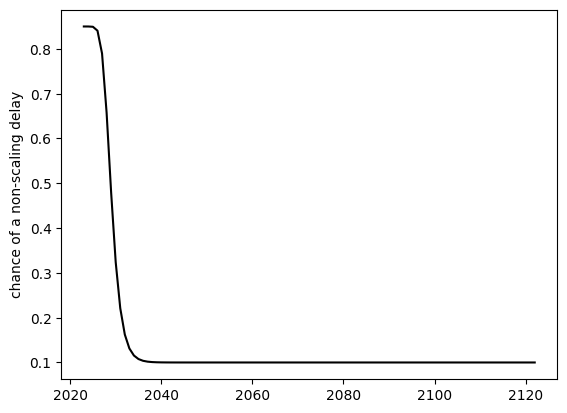

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 84%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 79%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.85),
                     (2027, 0.7),
                     (2030, 0.3),
                     (2035, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.3926   | 6.464     | 7.896     | 7.869     |
| 4         | -0.313    | 1.355     | 3.785     | 7.704     |
| 18        | -0.2766   | 1.115     | 8.474     | 4.231     |
| 20        | -0.2508   | 0.3293    | 5.132     | 7.017     |
| 41        | -0.25     | 0.01      | 8.207     | 6.778     |
| 42        | -0.25     | 0.01      | 6.344     | 5.323     |
| 52        | -0.25     | 0.01      | 8.563     | 4.836     |
| 55        | -0.25     | 0.01      | 5.286     | 4.344     |
| 56        | -0.25     | 0.01      | 6.984     | 4.193     |
| 59        | -0.25     | 0.01      | 10.0      | 4.04      |
| 64        | -0.2395   | 0.01      | 10.0      | 2.456     |
| 65        | -0.1519   | 0.1683    | 9.693     | 0.2972    |
| 68        | -0.104    | 0.01      | 9.568     | 0.9245    |
| 71        | -0.08637  | 0.1409    | 9.355     | 0.9123    |
| 86    

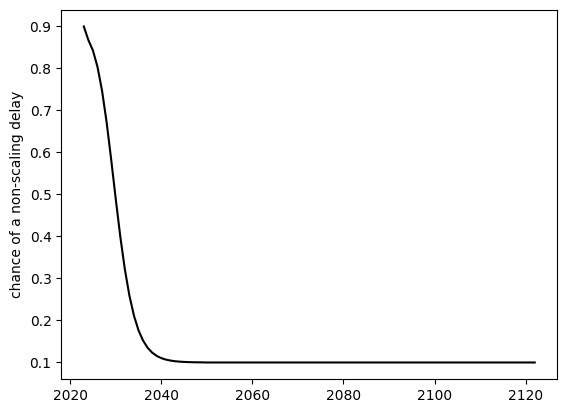

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 84%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 75%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2033

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2023, 0.9),
                     (2027, 0.7),
                     (2030, 0.5),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2701   | 0.6264    | 8.211     | 1.245     |
| 13        | -0.2008   | 0.6269    | 1.14      | 0.2154    |
| 43        | -0.1611   | 0.3382    | 0.9352    | 0.2126    |
| 44        | -0.1272   | 0.127     | 1.08      | 0.67      |
| 45        | -0.02974  | 0.01      | 0.5301    | 0.9019    |
| 81        | -0.02159  | 0.01      | 0.6479    | 0.8151    |
| 107       | -0.01774  | 0.0481    | 2.403     | 0.7704    |
Curve params found
{'push': 0.04810496411496534,
 'shift': 2.4025166337473403,
 'slope': 0.7703972968091841}
-
## Chance of nonscaling delay ##


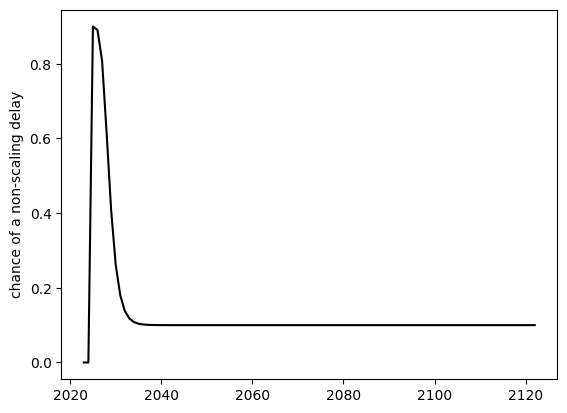

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 81%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 62%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 41%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2033 -

In [4]:
nonscaling_points = {'points': [(2025, 0.9),
                                (2027, 0.8),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.178    | 6.929     | 6.404     | 7.304     |
| 3         | -0.1257   | 2.36      | 9.522     | 1.502     |
| 4         | -0.1218   | 1.005     | 0.807     | 0.1806    |
| 13        | -0.08421  | 0.672     | 5.149     | 3.46      |
| 20        | -0.07851  | 0.5625    | 6.874     | 7.52      |
| 35        | -0.02788  | 0.1516    | 1.619     | 0.3431    |
| 54        | -0.01725  | 0.1073    | 1.453     | 0.4195    |
Curve params found
{'push': 0.10730914666940274,
 'shift': 1.453162349058713,
 'slope': 0.41951437253322643}
-
## Chance of nonscaling delay ##


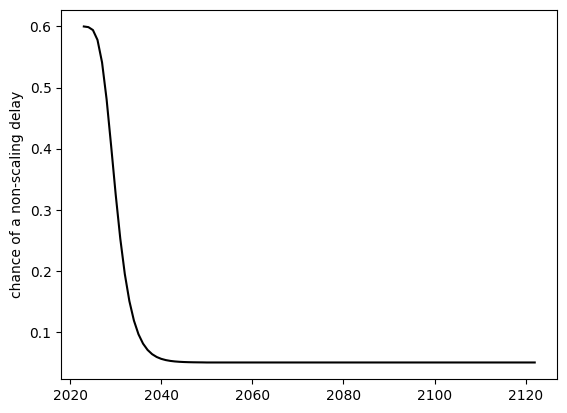

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 54%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 42        | -0.05     | 0.01      | 5.49      | 3.797     |
| 47        | -0.04999  | 0.01      | 5.112     | 2.1       |
| 82        | -0.04965  | 0.01      | 6.748     | 1.67      |
Curve params found
{'push': 0.01, 'shift': 6.748454971651444, 'slope': 1.669883149883684}
-
## Chance of nonscaling delay ##


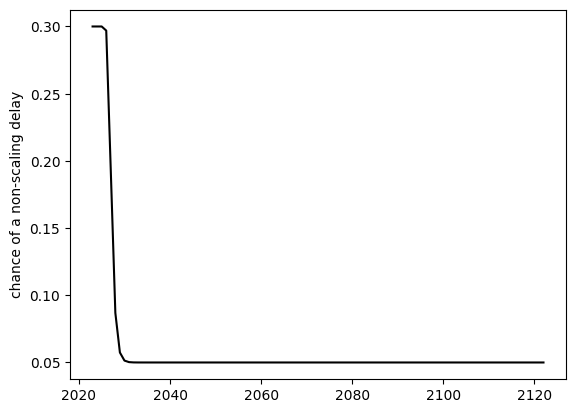

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - ch

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 31        | -0.03338  | 0.174     | 2.481     | 4.669     |
| 41        | -0.03333  | 0.01      | 6.057     | 0.5839    |
| 43        | -0.03333  | 0.01      | 7.148     | 2.468     |
| 80        | -0.03296  | 0.03194   | 6.124     | 1.49      |
| 92        | -0.007526 | 0.01      | 6.845     | 1.034     |
Curve params found
{'push': 0.01, 'shift': 6.844676442942214, 'slope': 1.034344485255281}
-
## Chance of nonscaling delay ##


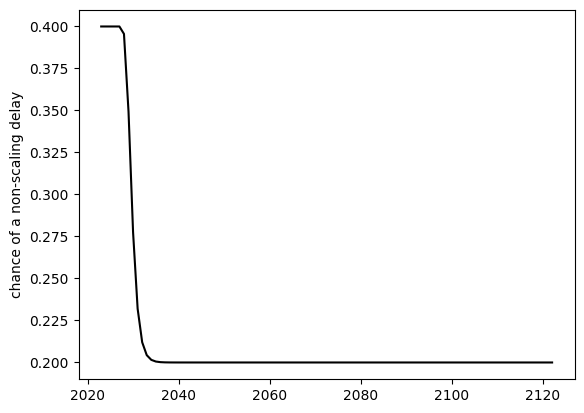

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.4),
                     (2030, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.1896   | 6.353     | 7.315     | 1.996     |
| 6         | -0.1663   | 2.726     | 4.634     | 3.963     |
| 8         | -0.1516   | 1.663     | 3.357     | 6.581     |
| 9         | -0.1345   | 1.488     | 5.8       | 9.988     |
| 27        | -0.1032   | 0.3885    | 3.175     | 1.8       |
| 41        | -0.06782  | 0.01      | 2.292     | 0.2334    |
| 52        | -0.04304  | 0.01      | 1.276     | 0.6474    |
| 66        | -0.03249  | 0.01      | 2.346     | 0.8152    |
Curve params found
{'push': 0.01, 'shift': 2.3459825323372008, 'slope': 0.815235175972732}
-
## Chance of nonscaling delay ##


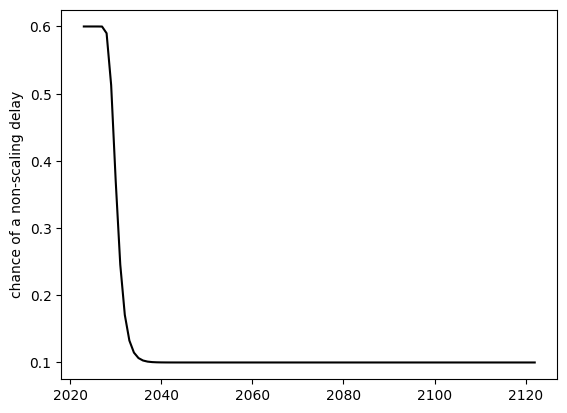

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2033

In [8]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Take off speeds

## Chance of nonscaling delay ##


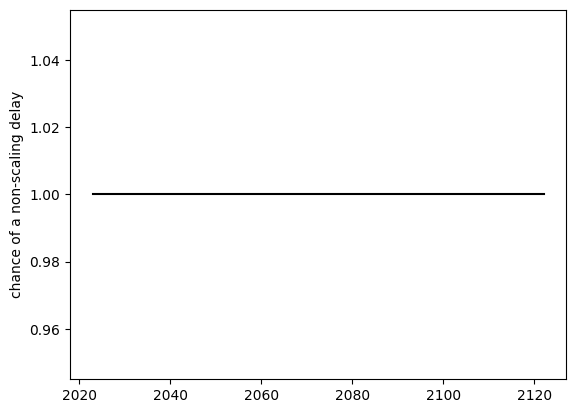

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 100%


In [9]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff

delays['take_off'] = {'prob': 1, 'length': sq.lognorm(1, 15)}
plot_nonscaling_delay(plt, years, lambda _: 1)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [10]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [11]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-07-09 16:18:48.178387
